<h1>Rodrigo Torres. C.I: 31.014.592 & Cristian Guevara. C.I: 31.567.525</h1>


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('model.txt', skiprows=3, sep=r'\s+')

In [71]:
df.head()

,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
0,19840101,0,20.8,243,7.3,1.25,1002.8,0.04,86.3
1,19840101,100,20.8,243,7.3,1.25,1002.2,0.04,86.9
2,19840101,200,20.6,243,7.4,1.24,1001.8,0.04,87.0
3,19840101,300,20.4,244,7.5,1.24,1001.5,0.05,86.2
4,19840101,400,20.3,245,7.5,1.24,1001.2,0.05,85.6


<h3>1.- Representar la matriz scatter de la velocidad y orientación del viento de los primeros mil registros.</h3>

In [72]:
#Código para el 1er ejercicio
df.head(1000)



,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
0,19840101,0,20.8,243,7.3,1.25,1002.8,0.04,86.3
1,19840101,100,20.8,243,7.3,1.25,1002.2,0.04,86.9
2,19840101,200,20.6,243,7.4,1.24,1001.8,0.04,87.0
3,19840101,300,20.4,244,7.5,1.24,1001.5,0.05,86.2
4,19840101,400,20.3,245,7.5,1.24,1001.2,0.05,85.6
...,...,...,...,...,...,...,...,...,...
995,19840211,1100,6.6,348,5.4,1.28,1026.8,0.40,90.4
996,19840211,1200,6.0,352,5.4,1.29,1027.0,0.48,91.7
997,19840211,1300,5.5,0,5.3,1.29,1026.9,0.67,92.2
998,19840211,1400,5.0,11,5.3,1.29,1026.9,0.75,92.6


<h3>2.- Misma matriz scatter para los 1000 registros con mayor velocidad, ordenados.</h3>

In [73]:
#Código para el 2do ejercicio

<h3>3.- Histograma de la velocidad del viento con 36 particiones.</h3>

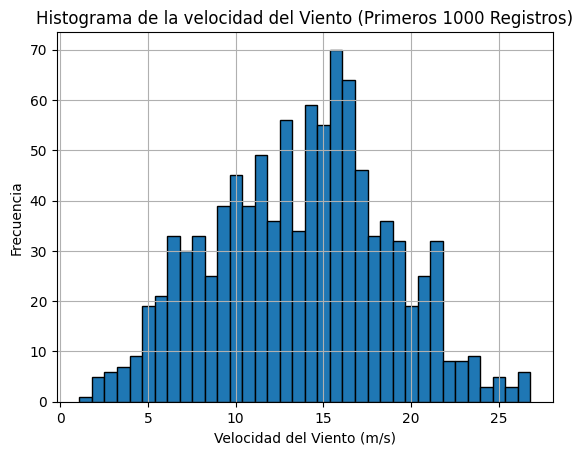

In [74]:
#Código para el 3er ejercicio
column_names = ['Fecha', 'Hora', 'Velocidad_viento', 'Direccion_viento', 'Temperatura', 'Densidad', 'Presion', 'RiNumber', 'Humedad']
df = pd.read_csv('model.txt', skiprows=4, sep=r'\s+', names=column_names)
data_first_1000 = df.head(1000)
plt.hist(data_first_1000['Velocidad_viento'], bins=36, edgecolor='black')
plt.xlabel('Velocidad del Viento (m/s)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la velocidad del Viento (Primeros 1000 Registros)')
plt.grid(True)
plt.show()

<h3>4.- Histórico de la velocidad media, con los datos agrupados por años y meses.</h3>

In [75]:
#Código para el 4to ejercicio

<h3>5.- Tabla de velocidades medias en función del año (filas) y del mes (columnas).</h3>

In [76]:
#Código para el 5to ejercicio

<h3>6.- Gráfica con los históricos de cada año, agrupados por meses, superpuestos.</h3>

In [77]:
#Código para el 6to ejercicio